In [78]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [79]:
#fonction 1 : créer la liste d'individus
#fonction 2 : fonctions déterminant les carcteres et qui remplie la liste
#fonction 3 : meeting 
#fonction 4 : fonction qui prend en compte l'écart entre chaque individus
#fonction 5 : fonction determine le temps estimer du couple
#fonction 6 : tarcer un tableau avec nuages de points et lignes
#fonction 7 : bonus-> mettre à jour la liste de départ en même temps que les meeting

In [80]:
def creation(nb_pers):
    j =0
    res = []
    while j < nb_pers:
        res.append([])
        j += 1
   
    return res

In [81]:
creation(10)

[[], [], [], [], [], [], [], [], [], []]

In [82]:
def age():
    return random.randint(18, 60)

In [83]:
def generation_travail(): #probleme on peut avoir des gens de 50 ans classés en étudiant 
                          #dans la deuxième version-> rajouter des if en fct de l'age
    a=random.random()
    if a<0.33:
        return "etudiant"
    elif a<0.66:
        return "travaille"
    else:
        return "chomage"

In [84]:
def nb_relation():
    if age() <= 25: #conditionne le nb de relations passée en fonction de l'age pour se rapprocher de la realité
        return random.randint(0, 6)
    else:
        a = random.random() # permet d'avoir peu de personnes avec peu de relation ou bcp trop
        if a < 0.2:
            return random.randint(0, 2)
        elif a > 0.9:
            return random.randint(10, 30)
        else :
            return random.randint(3, 9)

In [85]:
def moyenne_relation():
    a = age()    
    calcul = random.randint(3, (a * 12)-180) #choisi un nb de mois jusqu'à age moins 15ans pour se rapprocher du réel
    temps_tot = nb_relation() * calcul
    if nb_relation() == 0:
        return 0
    else :
        while temps_tot > (a * 12)-180:
            calcul = random.randint(3, (a * 12)-180)
            temps_tot = temps_tot = nb_relation() * calcul
        return calcul
        
# On peut rajouter des conditions pour que la durée moyenne soit cohérente avec l'age et le nb de relation

In [86]:
def envies():         # il faut revoir les if pour avoir des volontés plus proches de la vraie vie
    a = random.random() 
    if age() < 25:
        if a < 0.2:
            return "Q"
        elif a < 0.8:
            return "a voir"
        else :
            return "serieux"
    elif age() < 45:
        if a < 0.2:
            return "Q"
        elif a < 0.6:
            return "a voir"
        else :
            return "serieux"
    else:
        if a < 0.4:
            return "Q"
        elif a < 0.6:
            return "a voir"
        else :
            return "serieux"

In [87]:
def caract():#chacun des chiffre représente un caractère "type" qu'on peut retrouver dans le MBTI
    return random.randint(1, 4)  #les analystes, les aventuriers, les diplomates et les sentinelles

In [88]:
#il faudra une fonction qui remplace les valeurs de creation par les criteres définis par les fonctions
def vraie_liste(nb_pers):
    a = 0
    l = creation(nb_pers)
    res = []
    for a in range(len(l)):
        l[a].append(age())
        l[a].append(generation_travail())
        l[a].append(nb_relation())
        l[a].append(moyenne_relation())
        l[a].append(envies())
        l[a].append(caract())
        
    return l

In [89]:
vraie_liste(10)

[[20, 'chomage', 1, 491, 'serieux', 3],
 [56, 'etudiant', 7, 47, 'serieux', 2],
 [19, 'chomage', 5, 100, 'a voir', 1],
 [55, 'etudiant', 6, 107, 'serieux', 1],
 [50, 'etudiant', 2, 5, 'Q', 3],
 [22, 'chomage', 22, 439, 'Q', 4],
 [33, 'chomage', 0, 434, 'a voir', 1],
 [51, 'chomage', 8, 41, 'serieux', 2],
 [45, 'travaille', 8, 99, 'a voir', 3],
 [37, 'travaille', 2, 61, 'serieux', 1]]

In [90]:
def meeting(): 
    f = vraie_liste(10)
    a = f[random.randint(0, len(f)-1)]    
    b = f[random.randint(0, len(f)-1)]
    while b == a:                     #b peut avoir les mêmes valeurs que a mais il ne faut pas que ce soit la même personne
        b = f[random.randint(0, len(f)-1)]
    return a, b
    

In [91]:
meeting()

([22, 'travaille', 8, 151, 'serieux', 3], [39, 'etudiant', 4, 64, 'a voir', 3])

In [94]:
def meeting_duree(f,h): #renvoie la durée supposée et le nb de caracteres en commun
    res=0
  
    print(f,h)
    l=[]
    for i in range(len(f)):
        if f[i]==h[i]:
            res=res+1
    if res >= 3:
        l.append(res/3*random.randint(3,30))
        l.append(res)
    else:
        l.append(res/3*random.randint(1,25))
        l.append(res)
    
    return l           # avec la creation d'une liste au hasard il y a très peu de point communs donc il faut la distance

In [95]:
meeting_duree([18,"hetero","etudiant"],[18,"hetero","etudiant"])

[18, 'hetero', 'etudiant'] [18, 'hetero', 'etudiant']


[15.0, 3]

In [96]:
 #on veut tracer un graphe du temps estimer de la relation en fonction des points communs
def coordonees(nb_tirage, taille): #on rentre le nombre de tirages qu'on souhaite faire et la taille de la liste de départ
    f = creation(taille)
    duo = meeting()
    l = meeting_duree(duo[0], duo[1])    
    i=0
    plt.title("durée du couple en fonction du nombre de points communs")
    plt.axis([0, len(duo[0]), 0, 50])# définie l'échelle du graphe
    while i < nb_tirage:
        duo = meeting()
        l = meeting_duree(duo[0], duo[1]) 
        x=l[1]
        y=l[0]
        i += 1
        plt.scatter(x,y)
    plt.show 




[53, 'travaille', 0, 3, 'Q', 3] [54, 'chomage', 1, 28, 'a voir', 4]
[54, 'etudiant', 3, 243, 'a voir', 2] [18, 'travaille', 4, 170, 'Q', 4]
[34, 'etudiant', 0, 37, 'serieux', 2] [42, 'etudiant', 8, 0, 'a voir', 3]
[57, 'travaille', 1, 13, 'a voir', 2] [26, 'chomage', 2, 20, 'a voir', 4]
[50, 'chomage', 4, 10, 'a voir', 4] [35, 'chomage', 8, 91, 'Q', 1]
[53, 'travaille', 9, 37, 'a voir', 3] [40, 'chomage', 3, 49, 'serieux', 3]
[55, 'travaille', 1, 343, 'Q', 3] [37, 'travaille', 9, 150, 'a voir', 3]
[55, 'travaille', 4, 102, 'Q', 1] [18, 'travaille', 9, 147, 'a voir', 2]
[36, 'chomage', 8, 11, 'a voir', 2] [34, 'etudiant', 6, 122, 'a voir', 2]
[48, 'etudiant', 5, 21, 'serieux', 4] [35, 'chomage', 4, 8, 'serieux', 1]
[18, 'chomage', 6, 0, 'Q', 2] [24, 'chomage', 8, 19, 'serieux', 3]
[39, 'etudiant', 6, 0, 'serieux', 2] [38, 'etudiant', 8, 117, 'a voir', 2]
[34, 'travaille', 7, 102, 'a voir', 4] [52, 'travaille', 1, 11, 'a voir', 2]
[27, 'travaille', 5, 174, 'Q', 1] [33, 'etudiant', 5, 231

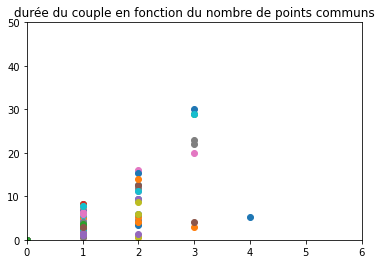

In [97]:
coordonees(100, 100) #version 1 on obtient une première courbe qui tient la route
                    #il faut affiner les fct qui détermine les individus car il y a des incohérences

In [98]:
meeting_duree([45, 'etudiant', 1, 466, 'serieux', 3], [52, 'chomage', 7, 0, 'serieux', 1])

[45, 'etudiant', 1, 466, 'serieux', 3] [52, 'chomage', 7, 0, 'serieux', 1]


[4.333333333333333, 1]